In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv file

df_stocks=pd.read_csv(r"C:\Users\devanshu suri\Downloads\company-stock-time-series\Company Stock and Investment.csv")
df_stocks

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
# Displaying first few rows

df_stocks.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
# Making a separate dataframe for Comp Stock

df_stocks_comp=pd.DataFrame({"Date":df_stocks.Date,"Comp_Stock":df_stocks['Comp Stock']})
df_stocks_comp

,Date,Comp_Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849
...,...,...
1979,09-11-2017,-0.002043
1980,10-11-2017,-0.006880
1981,13-11-2017,-0.004008
1982,14-11-2017,-0.015118


In [5]:
# convert  datatype into datetime datatype

df_stocks_comp['Date']=pd.to_datetime(df_stocks_comp['Date'])

#preprocessing (since arima takes univariate series as input so we setting date feature as index)
df_stocks_comp.set_index('Date',inplace=True)

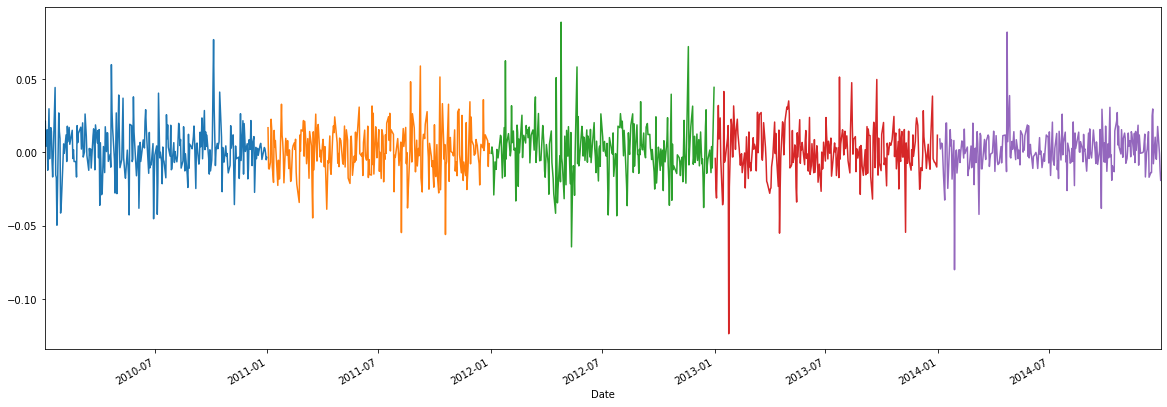

In [6]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(for year 2010 -2014)...
plt.subplots(figsize=(20,7))
df_stocks_comp.loc['2010', 'Comp_Stock'].plot()
df_stocks_comp.loc['2011', 'Comp_Stock'].plot()
df_stocks_comp.loc['2012', 'Comp_Stock'].plot()
df_stocks_comp.loc['2013', 'Comp_Stock'].plot()
df_stocks_comp.loc['2014', 'Comp_Stock'].plot()

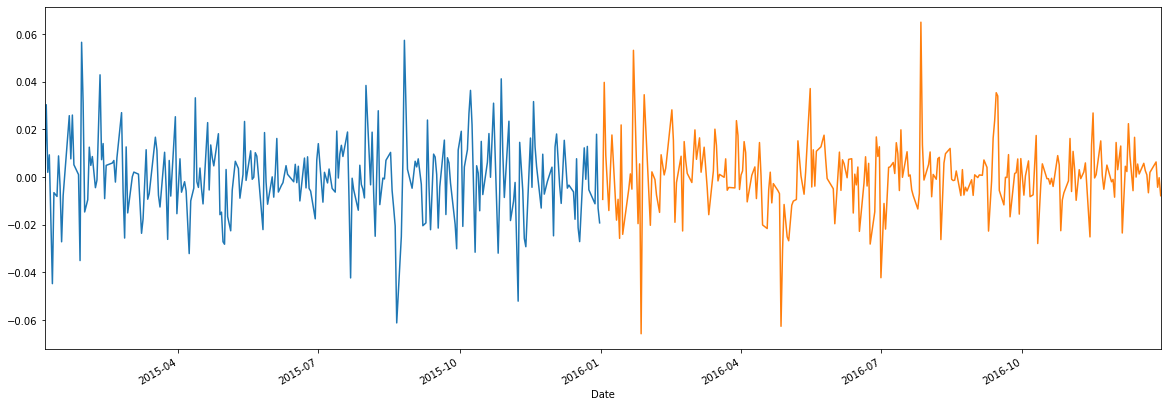

In [7]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(2015 -2016)...
plt.subplots(figsize=(20,7))
df_stocks_comp.loc['2015', 'Comp_Stock'].plot()
df_stocks_comp.loc['2016', 'Comp_Stock'].plot()

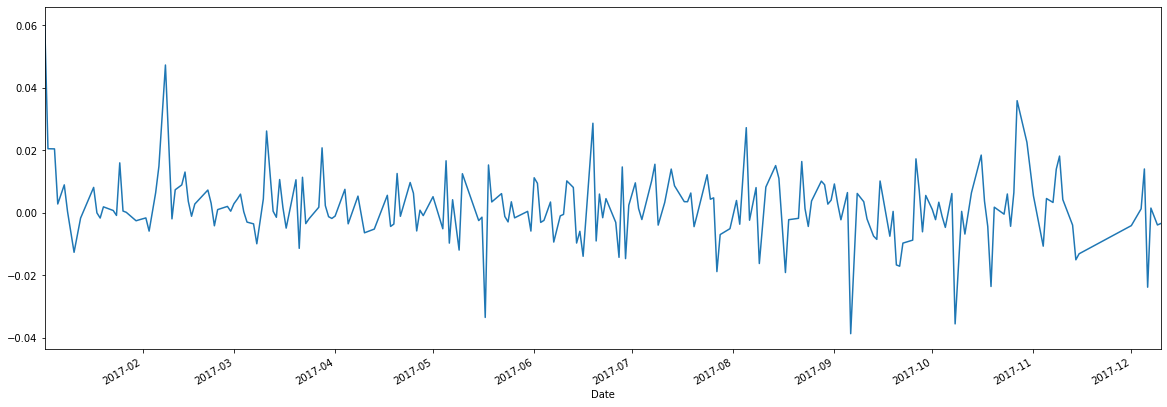

In [8]:
# Plotting data for year 2017..
plt.subplots(figsize=(20,7))
df_stocks_comp.loc['2017', 'Comp_Stock'].plot()

* In above plot data looks like seasonal data. Now we will check if data is stationary or not

In [9]:
#Ho: It is non stationary
#H1: It is stationary
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [10]:
# displaying adfuller values

adfuller_test(df_stocks_comp['Comp_Stock'])

ADF Test Statistic : -12.473386265908243
p-value : 3.207774293089883e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


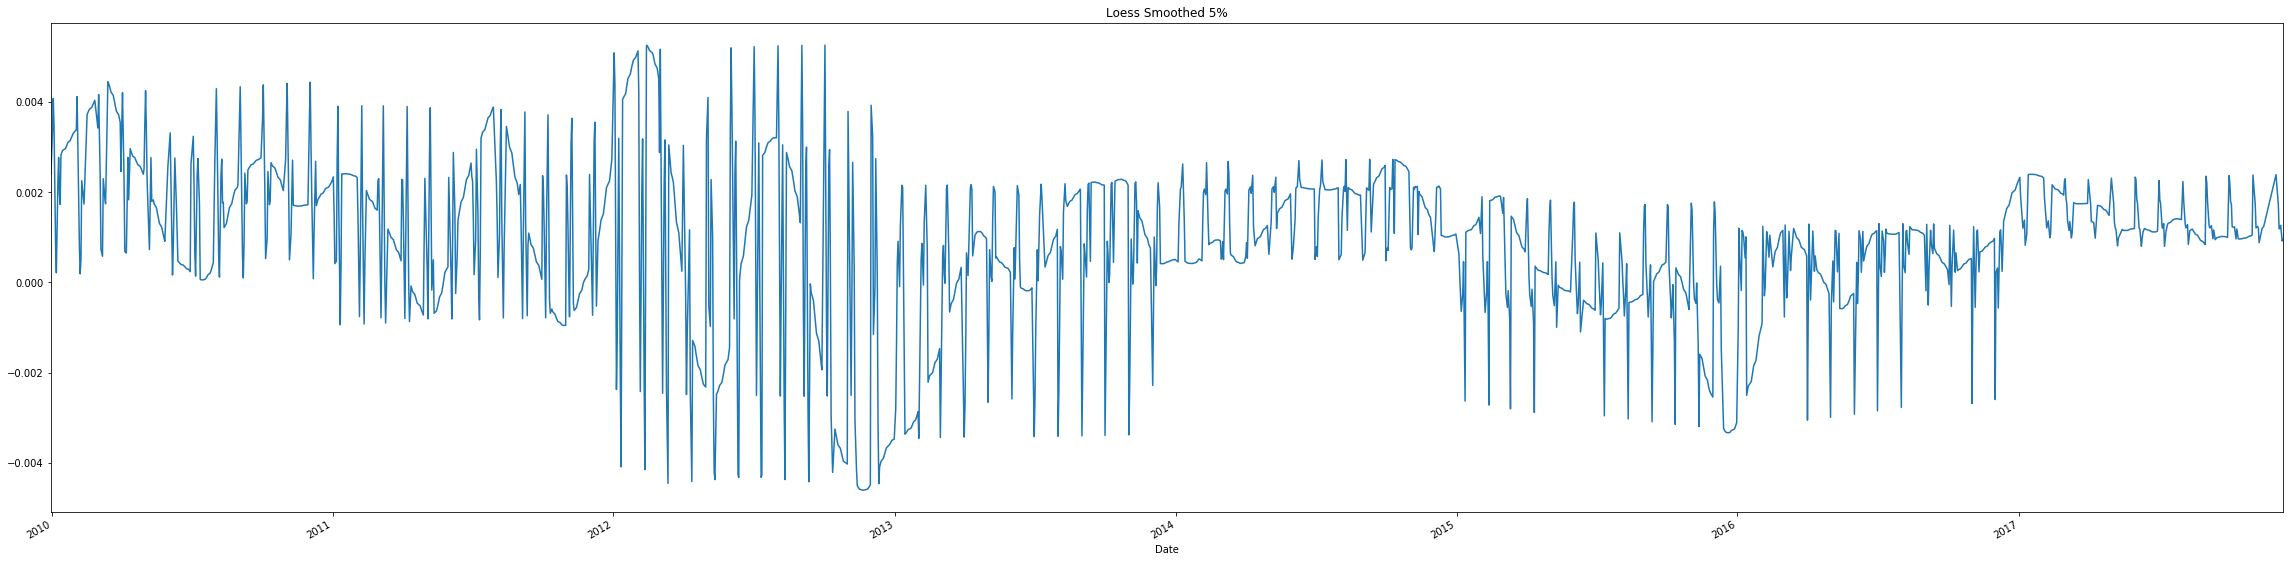

In [11]:
# Smooth graph for the data

from statsmodels.nonparametric.smoothers_lowess import lowess
df_loess_5 = pd.DataFrame(lowess(df_stocks_comp.Comp_Stock, np.arange(len(df_stocks_comp.Comp_Stock)), frac=0.05)[:, 1], index=df_stocks_comp.index, columns=['Comp_Stock'])
df_loess_5['Comp_Stock'].plot( title='Loess Smoothed 5%',figsize=(40,10))

>> To visualise the data clearly we  use smoothers_lowess

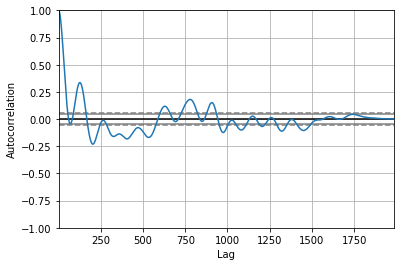

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_loess_5['Comp_Stock'])
plt.show()

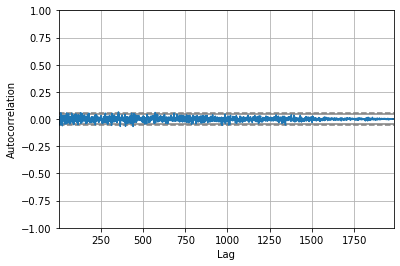

In [13]:
autocorrelation_plot(df_stocks_comp['Comp_Stock'])
plt.show()

* **In above plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\devanshu suri\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


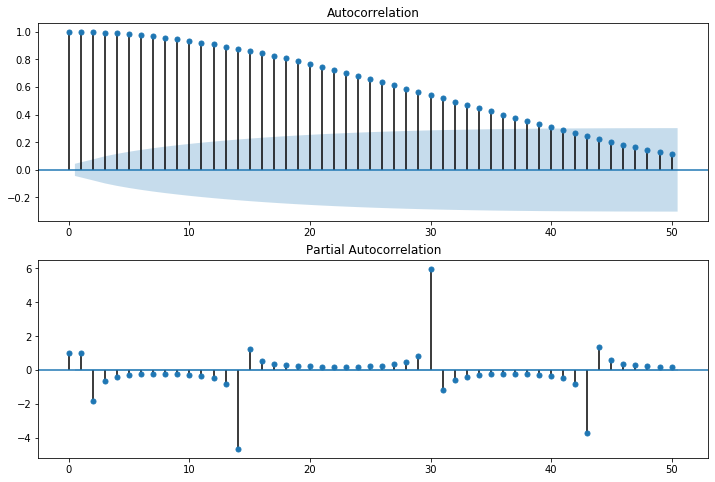

In [15]:
# Plotting autocorreltion plot partial autocorreltion plot

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_loess_5['Comp_Stock'].iloc[1:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_loess_5['Comp_Stock'].iloc[1:],lags=50,ax=ax2)

>> Plotting ACF and PACF graphs will get us p and q values and d=0 as the data is stationary but from above ACF and PACf graphs  we can say the values of p and q is not clear,so its difficult to implement arima so we are going to use auto_arima.


In [16]:
# Create Training and Validation sets
# train contains 6yr data (2009-2016)
train = df_stocks_comp['Comp_Stock'][:1512]
# test contains 2yr data (2016-2017)
validation=df_stocks_comp['Comp_Stock'][1513:1986]


>> In Auto ARIMA, it will generate itself the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [17]:
import pmdarima as pm
pmodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=19.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-6959.616, Time=0.53 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-7405.583, Time=6.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=14.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-6961.607, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6958.031, Time=0.80 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-7539.145, Time=16.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=33.00 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=13.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-7539.783, Time=8.50 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-7407.040, Time=3.88 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=26.01 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.10 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-7539.170, Time=17.12 sec
 ARIMA(1,0,1)(2,1,0)[12] intercep

In [18]:
pmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1512
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                3773.836
Date:                  Sun, 01 Nov 2020   AIC                          -7541.672
Time:                          19:09:47   BIC                          -7525.732
Sample:                               0   HQIC                         -7535.734
                                 - 1512                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6536      0.021    -31.546      0.000      -0.694      -0.613
ar.S.L24      -0.2930      0.020    -14.398      0.000      -0.333      -0.253
sigma2         0.0004   9.34e-06     40.726      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      211.21   Jarque-Bera (JB):               371.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.11
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

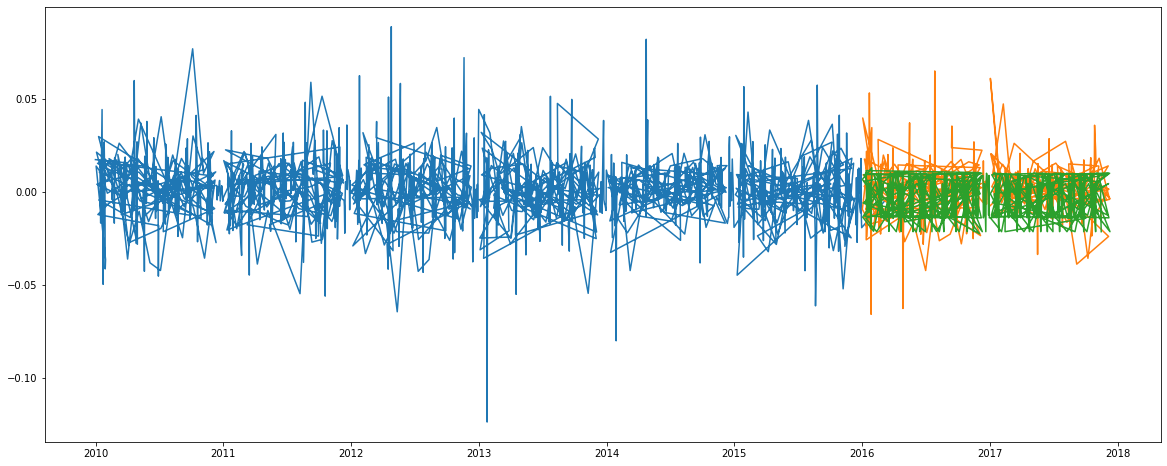

In [19]:
# Forecasting the model over validation data i.e 2017 and 2018


forecast = pmodel.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = validation.index,columns=['Prediction'])

#plot the predictions for validation set
plt.subplots(figsize=(20,8))
plt.plot(train, label='Train')
plt.plot(validation, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [20]:
# Printing Errors..
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(validation, forecast)
print('MSE(Mean Squarred Error): '+str(mse))
mae = mean_absolute_error(validation, forecast)
print('MAE(Mean Absolute Error): '+str(mae))
rmse = np.sqrt(mean_squared_error(validation, forecast))
print('RMSE(Root Mean Squared Error): '+str(rmse))

MSE(Mean Squarred Error): 0.00030875864700328126
MAE(Mean Absolute Error): 0.014068197152353128
RMSE(Root Mean Squared Error): 0.017571529444054698


In [21]:
# Saving the data in a dataframe

forecast["Previous"]=df_stocks_comp["Comp_Stock"]

In [22]:
forecast

,Prediction,Previous
Date,,
2016-06-01,0.002509,-0.019570
2016-07-01,-0.011253,-0.042205
2016-08-01,-0.021193,0.005288
2016-11-01,0.005698,0.016192
2016-12-01,0.010407,0.014513
...,...,...
2017-09-11,-0.013014,-0.002043
2017-10-11,-0.005781,-0.006880
2017-11-13,0.004498,-0.004008


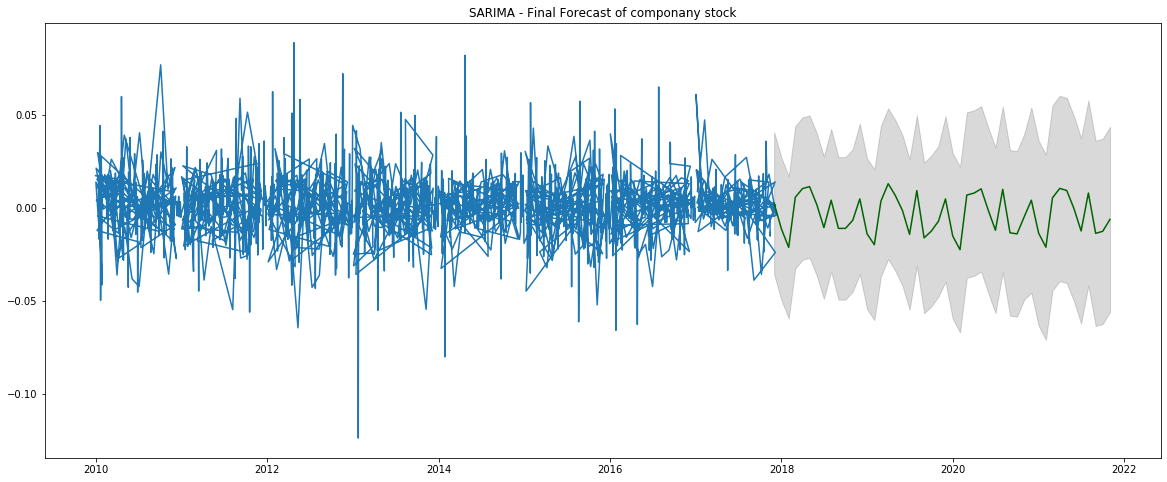

In [23]:
# Forecasting the model over the 2019 , 2020 and 2021 year

fitted, confint = pmodel.predict(n_periods=48, return_conf_int=True)
index_of_fc = pd.date_range(validation.index[-1], periods = 48, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.subplots(figsize=(20,8))
plt.plot(df_stocks_comp)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of componany stock")
plt.show()

In [24]:
# Let's create a dataframe to take  forecast values and thn give the column name to those values i.e Date and Comp_Stock_Pred

fitted_series_pred = pd.DataFrame(fitted_series,columns=["Comp_Stock_Pred"]) 
fitted_series_pred.index.name="Date"
fitted_series_pred

,Comp_Stock_Pred
Date,
2017-12-01,0.002509
2018-01-01,-0.011253
2018-02-01,-0.021193
2018-03-01,0.005698
2018-04-01,0.010407
2018-05-01,0.011465
2018-06-01,0.001720
2018-07-01,-0.010557
2018-08-01,0.004135


In [25]:
#Save the predicted values into a excel file
fitted_series_pred.to_excel(r"C:\Users\devanshu suri\Downloads\Comp_Stock_Prediction.xlsx")

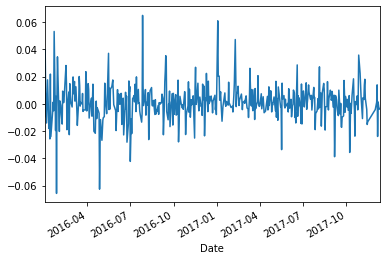

In [26]:
validation.plot(label='Previous data')

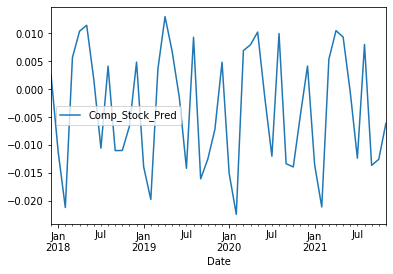

In [27]:
fitted_series_pred.plot()

## Conclusion
>> Comp Stock value increases in month (march to april) in year 2018 and 2019 and  for year 2020 and 2021 the comp stocks increases in the months (march to may)

>> Comp Stocks values will decreases in (November,2020 to February,2021 ) , (June,2021 to July,2021) ,(August,2021 to September,2021).

>> In 2021 the values of stocks is a bit more as compared to previous years stocks(2018,2019,2020) but Overall forecasted years(2018-2021) comp stock values are less as compared to the training data from(2009-2017).